In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import keras
import os, sys
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
from keras.models import load_model
model = load_model('resolutor.h5')

In [4]:
os.listdir()

['consine proximity.png',
 'index_out.jpeg',
 'mean absolute error.png',
 'interpolate image.ipynb',
 'resolutor.h5',
 'mean absolute percentage error.png',
 '.ipynb_checkpoints',
 'index.jpeg']

In [5]:
image = cv2.imread('index.jpeg')
arr= np.asarray(image)

In [6]:
r,g,b = arr[:,:,0], arr[:,:,1], arr[:,:,2]

In [7]:
r.shape, g.shape, b.shape

((203, 248), (203, 248), (203, 248))

In [8]:
# test
val = np.array([20])
tuple(model.predict(val)[0])

(20.289347, 20.241028, 20.291874, 20.234015)

In [9]:
# r,g,b interpolate
k = 2
a,m = r.shape
resolutor_r = np.ones((k*a,k*m))
resolutor_g = np.ones((k*a,k*m))
resolutor_b = np.ones((k*a, k*m))

In [10]:
def interpol_r(i,j):
    a,b,c,d = tuple(model.predict(np.array([r[i][j]]))[0])
    resolutor_r[i][j] = d
    resolutor_r[i-1][j-1] = a
    resolutor_r[i-1][j] = b
    resolutor_r[i][j-1] = c
    return

def interpol_b(i,j):
    a,b,c,d = tuple(model.predict(np.array([r[i][j]]))[0])
    resolutor_b[i][j] = d
    resolutor_b[i-1][j-1] = a
    resolutor_b[i-1][j] = b
    resolutor_b[i][j-1] = c
    return

def interpol_g(i,j):
    a,b,c,d = tuple(model.predict(np.array([r[i][j]]))[0])
    resolutor_g[i][j] = d
    resolutor_g[i-1][j-1] = a
    resolutor_g[i-1][j] = b
    resolutor_g[i][j-1] = c
    return

In [11]:
b.shape,g.shape, b.shape

((203, 248), (203, 248), (203, 248))

In [12]:
# r interpolate


none_r = [interpol_r(i,j) for i,f in enumerate(r) for j,k in enumerate(f)]
none_b = [interpol_b(i,j) for i,f in enumerate(b) for j,k in enumerate(f)]
none_g = [interpol_g(i,j) for i,f in enumerate(g) for j,k in enumerate(f)]
        

In [13]:
output = np.zeros([406,496,3], dtype = np.uint8)
output[:,:,0] = resolutor_r
output[:,:,1] = resolutor_g
output[:,:,2] = resolutor_b


In [14]:
output.shape
output = output.astype(np.float64)

In [15]:
output.shape

(406, 496, 3)

In [16]:
from PIL import Image
#img = Image.fromarray(output, 'RGB')
cv2.imwrite('index_out.jpeg', output)

True

In [17]:
img = cv2.imread('index_out.jpeg')
cv2.imshow('out', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<Figure size 14616x17856 with 0 Axes>

<Figure size 29232x35712 with 0 Axes>

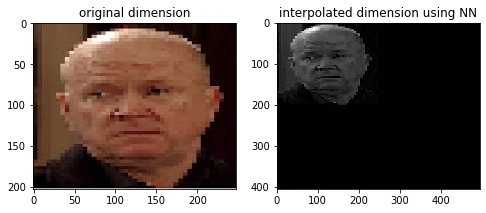

In [18]:
# figure size = (width,height)
import matplotlib.image as pltimg

f1 = plt.figure(figsize=(203,248))
f2 = plt.figure(figsize=(406,496))

imgone=pltimg.imread('index.jpeg')
imgtwo=pltimg.imread('index_out.jpeg')


fig=plt.figure(figsize=(8, 8))

img = imgone
fig.add_subplot(221)
plt.title('original dimension')
plt.imshow(img)

img = imgtwo
fig.add_subplot(222)
plt.title('interpolated dimension using NN')
plt.imshow(img)
plt.show()